In [18]:
import pandas as pd
from prophet import Prophet
from datetime import datetime

In [4]:
df = pd.read_csv('./london_weather.csv')

In [5]:
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [19]:
def convert_int_to_datetime(date_int):
    date_str = str(date_int)
    return datetime.strptime(date_str, '%Y%m%d')

df['date'] = df['date'].apply(convert_int_to_datetime)
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [20]:
mean_df = df[['date', 'mean_temp']]
mean_df = mean_df.rename(columns={'date':'ds', 'mean_temp': 'y'})

In [21]:
mean_df

,ds,y
0,1979-01-01,-4.1
1,1979-01-02,-2.6
2,1979-01-03,-2.8
3,1979-01-04,-2.6
4,1979-01-05,-0.8
...,...,...
15336,2020-12-27,7.5
15337,2020-12-28,1.1
15338,2020-12-29,2.6
15339,2020-12-30,2.7


In [22]:
model = Prophet()
model.fit(mean_df)
future = model.make_future_dataframe(periods=30)

21:57:09 - cmdstanpy - INFO - Chain [1] start processing
21:57:11 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
future

,ds
0,1979-01-01
1,1979-01-02
2,1979-01-03
3,1979-01-04
4,1979-01-05
...,...
15330,2021-01-26
15331,2021-01-27
15332,2021-01-28
15333,2021-01-29


In [24]:
forecast = model.predict(future)

In [25]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1979-01-01,10.073556,0.644807,7.697026,10.073556,10.073556,-5.967687,-5.967687,-5.967687,-0.009022,-0.009022,-0.009022,-5.958666,-5.958666,-5.958666,0.0,0.0,0.0,4.105869
1,1979-01-02,10.074010,0.199011,7.542118,10.074010,10.074010,-6.015453,-6.015453,-6.015453,-0.020539,-0.020539,-0.020539,-5.994914,-5.994914,-5.994914,0.0,0.0,0.0,4.058557
2,1979-01-03,10.074464,0.242209,7.794051,10.074464,10.074464,-5.986647,-5.986647,-5.986647,0.045498,0.045498,0.045498,-6.032145,-6.032145,-6.032145,0.0,0.0,0.0,4.087817
3,1979-01-04,10.074918,0.512698,7.652221,10.074918,10.074918,-6.045813,-6.045813,-6.045813,0.024069,0.024069,0.024069,-6.069882,-6.069882,-6.069882,0.0,0.0,0.0,4.029105
4,1979-01-05,10.075372,0.361317,7.720569,10.075372,10.075372,-6.115762,-6.115762,-6.115762,-0.008151,-0.008151,-0.008151,-6.107611,-6.107611,-6.107611,0.0,0.0,0.0,3.959610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,2021-01-26,12.664210,2.639859,10.193797,12.664210,12.664210,-6.315282,-6.315282,-6.315282,-0.020539,-0.020539,-0.020539,-6.294744,-6.294744,-6.294744,0.0,0.0,0.0,6.348928
15331,2021-01-27,12.664536,2.874440,10.059458,12.664536,12.664536,-6.235265,-6.235265,-6.235265,0.045498,0.045498,0.045498,-6.280763,-6.280763,-6.280763,0.0,0.0,0.0,6.429271
15332,2021-01-28,12.664862,2.840778,10.124162,12.664862,12.664862,-6.243898,-6.243898,-6.243898,0.024069,0.024069,0.024069,-6.267966,-6.267966,-6.267966,0.0,0.0,0.0,6.420964
15333,2021-01-29,12.665188,2.602450,9.792791,12.665188,12.665188,-6.264919,-6.264919,-6.264919,-0.008151,-0.008151,-0.008151,-6.256768,-6.256768,-6.256768,0.0,0.0,0.0,6.400269


C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\jnpre\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


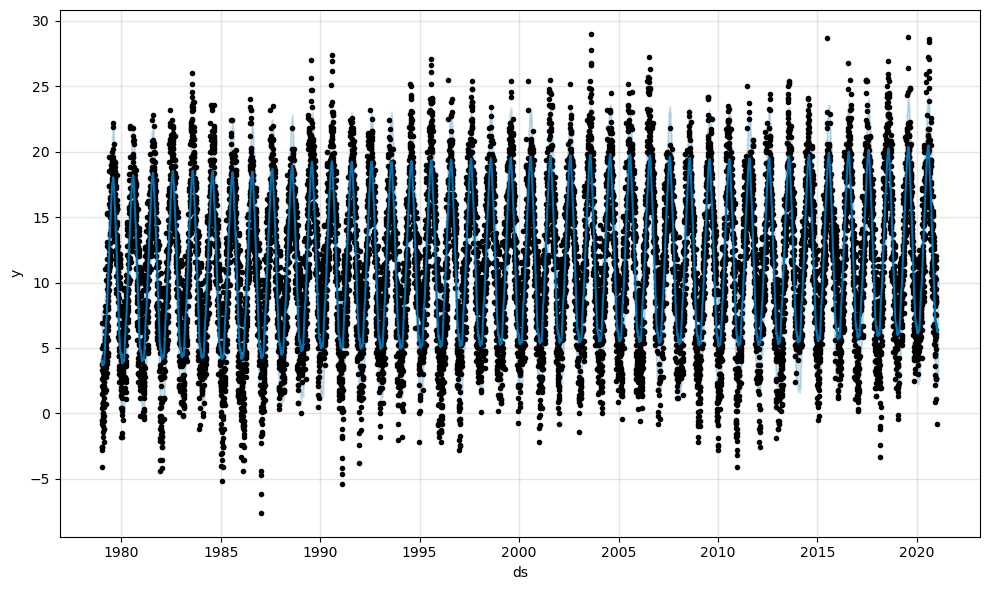

In [26]:
# This shows a narrow prediction line, indicating past trends can be used to make a prediction about average daily temps
fig = model.plot(forecast)